In [3]:
#Preprocessing of Images
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D,Convolution2D,Dense,Dropout,Flatten

Using TensorFlow backend.


In [4]:
train_datagen=ImageDataGenerator(
                       rescale=1./255,
                       shear_range=0.2,
                       zoom_range=0.2,
                       )
validation_datagen=ImageDataGenerator(
                       rescale=1./255,
                       shear_range=0.2,
                       zoom_range=0.2,
                       )
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory(
                                                './chest_xray/train',
                                                 target_size=(150,150),batch_size=32,class_mode='binary')
validation_set=train_datagen.flow_from_directory(
                                                './chest_xray/val',
                                                 target_size=(150,150
                                                             ),batch_size=32,class_mode='binary')                              
 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
model=Sequential()
model.add(Convolution2D(32,(5,5),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)            

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
hist=model.fit_generator(training_set,steps_per_epoch=1000,epochs=5,validation_data=validation_set,validation_steps=100)

Epoch 1/5
1000/1000 [==============================] - 959s 959ms/step - loss: 0.2180 - accuracy: 0.9121 - val_loss: 1.6283 - val_accuracy: 0.6000
Epoch 2/5
1000/1000 [==============================] - 893s 893ms/step - loss: 0.1251 - accuracy: 0.9522 - val_loss: 0.5672 - val_accuracy: 0.7044
Epoch 3/5
1000/1000 [==============================] - 887s 887ms/step - loss: 0.0971 - accuracy: 0.9630 - val_loss: 0.4769 - val_accuracy: 0.7669
Epoch 4/5
1000/1000 [==============================] - 917s 917ms/step - loss: 0.0854 - accuracy: 0.9686 - val_loss: 0.1269 - val_accuracy: 0.8100
Epoch 5/5
1000/1000 [==============================] - 931s 931ms/step - loss: 0.0676 - accuracy: 0.9741 - val_loss: 0.5806 - val_accuracy: 0.8719


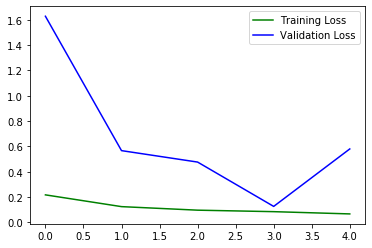

In [9]:
plt.figure(0)
plt.plot(hist.history['loss'],'g',label='Training Loss')
plt.plot(hist.history['val_loss'],'b',label='Validation Loss')
plt.legend()
plt.show()

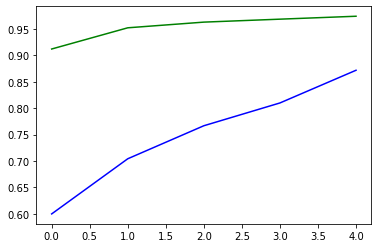

In [11]:
plt.figure(0)
plt.plot(hist.history['accuracy'],'g',label='Training Acc')
plt.plot(hist.history['val_accuracy'],'b',label='Validation Acc')
plt.show()